# Decision Tree Regression

#### Decision Tree Regression is used when we predict continuous data
#### - Criteria for dividing nodes: MSE
#### - Leaf node's value: mean value of the samples in the area

## Import Libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the dataset

In [13]:
data = pd.read_csv("./dataset.csv")
df = pd.DataFrame(data)
df

,Major,Year,Gender,StudyHours
0,SW,2,F,20
1,Math,3,M,20
2,Art,3,F,15
3,English,3,M,28
4,Math,3,F,26
5,English,3,M,17
6,Math,3,F,26
7,SW,3,F,40
8,SW,3,M,33
9,English,3,M,18


## One-Hot-Encoding

In [14]:
df_encoded = pd.get_dummies(df, columns=['Major'], prefix='Major')
df_encoded = pd.get_dummies(df_encoded, columns=['Gender'], prefix='Gender')
df_encoded = df_encoded.astype(int)

In [15]:
df_encoded

,Year,StudyHours,Major_Art,Major_English,Major_Math,Major_SW,Gender_F,Gender_M
0,2,20,0,0,0,1,1,0
1,3,20,0,0,1,0,0,1
2,3,15,1,0,0,0,1,0
3,3,28,0,1,0,0,0,1
4,3,26,0,0,1,0,1,0
5,3,17,0,1,0,0,0,1
6,3,26,0,0,1,0,1,0
7,3,40,0,0,0,1,1,0
8,3,33,0,0,0,1,0,1
9,3,18,0,1,0,0,0,1


## Split X, y

In [16]:
X = df_encoded.drop(columns='StudyHours')
y = df_encoded['StudyHours']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Check DecisionTreeRegressor parameters

In [17]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Parameter optimization(GridSearchCV)

In [18]:
model = DecisionTreeRegressor()

param_grid = {'max_depth': [2,3,4,5,6],
              'min_samples_split': [2,3,4]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best score: ', grid_search.best_score_)

best parameters:  {'max_depth': 5, 'min_samples_split': 3}
best score:  -135.425


## Best model

In [19]:
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

## Evaluate model performance

In [20]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R²: ', r2_score(y_test, y_pred))

MAE:  2.5
RMSE:  2.9011491975882016
R²:  0.8981854838709677


## Visualization

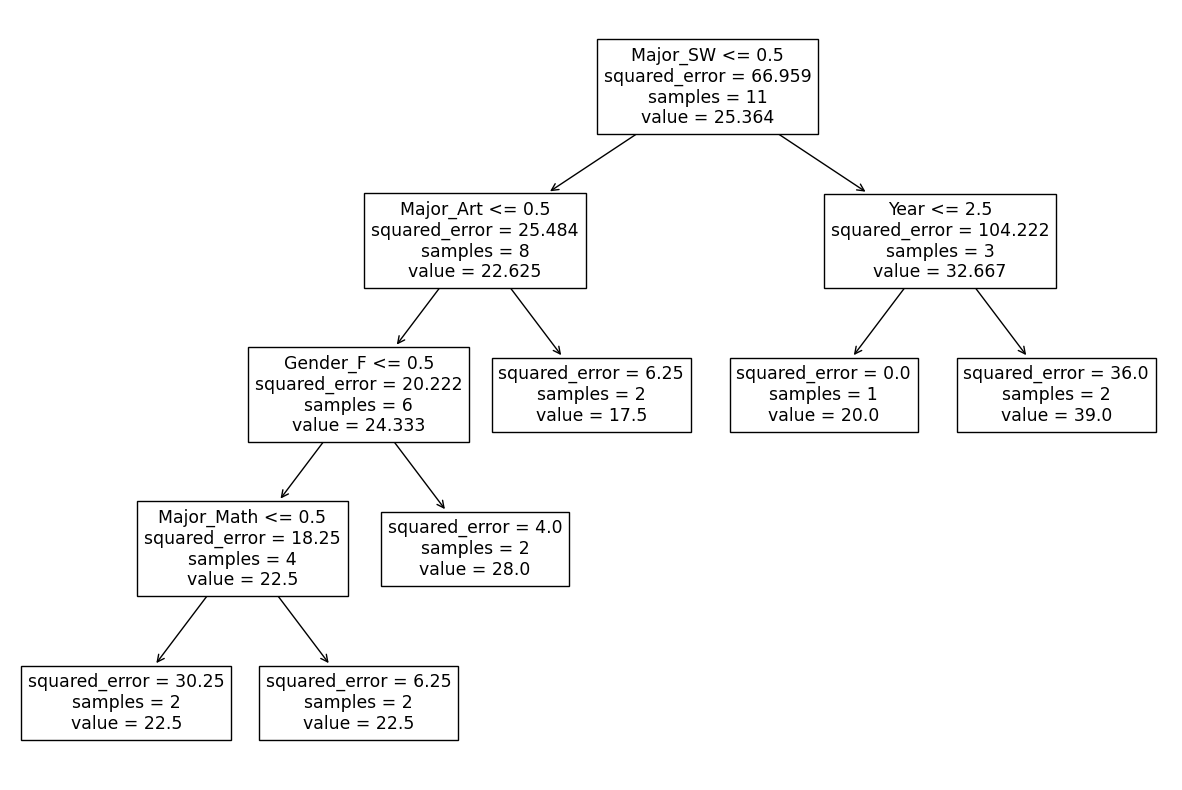

Actual tree depth:  <bound method BaseDecisionTree.get_depth of DecisionTreeRegressor(max_depth=5, min_samples_split=3)>


In [21]:
fig = plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X.columns)
plt.show()
print('Actual tree depth: ', best_model.get_depth)